# 3<br>Introduction to Hypothesis Testing:<br>Permutation Tests

In [1]:
import pandas as pd

beerwings = pd.read_csv('rawdata\Beerwings.csv')

In [2]:
beerwings.groupby('Gender').describe()['Hotwings']

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,15.0,9.333333,3.559026,4.0,6.5,9.0,12.5,14.0
M,15.0,14.533333,4.501851,7.0,12.0,16.0,17.5,21.0


# Two-sample Permutation test

In [9]:
import numpy as np

def statistic(x,y, axis):
    return np.mean(x, axis= axis) - np.mean(y, axis= axis)

In [5]:
x = beerwings.loc[beerwings['Gender'] == 'M','Hotwings']
y = beerwings.loc[beerwings['Gender'] == 'F','Hotwings']
statistic(x= x, y= y, axis= 0)

5.199999999999999

In [11]:
from scipy.stats import permutation_test

res = permutation_test((x,y), statistic, vectorized= True, n_resamples= 99999, alternative= 'greater')

In [12]:
res.statistic, res.pvalue

(5.199999999999999, 0.00118)

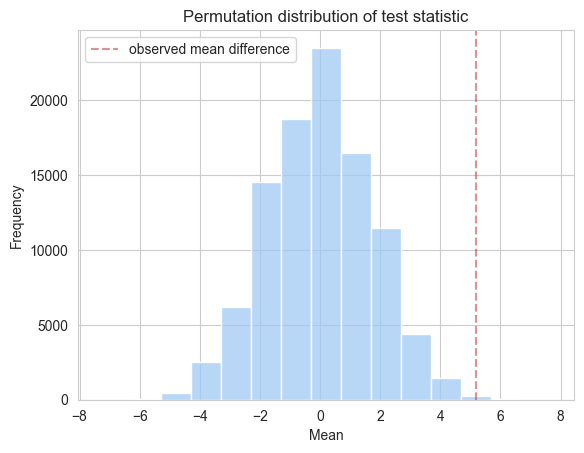

In [42]:
import seaborn as sns

sns.set_palette('pastel')
sns.set_style('whitegrid')

fig = sns.histplot(res.null_distribution, discrete= True)
fig.axvline(x= res.statistic, color = '#b4292c', alpha = 0.5, linestyle = '--', label = "observed mean difference" )
fig.set_xlabel("Mean")
fig.set_ylabel('Frequency')
fig.set_title("Permutation distribution of test statistic")
fig.legend()

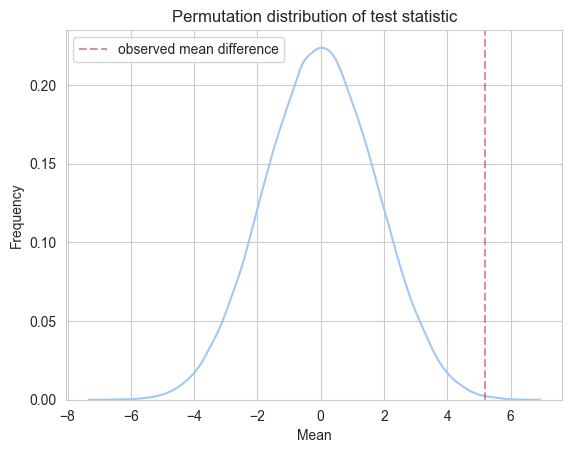

In [44]:
import seaborn as sns

sns.set_palette('pastel')
sns.set_style('whitegrid')

fig = sns.kdeplot(res.null_distribution)
fig.axvline(x= res.statistic, color = '#b4292c', alpha = 0.5, linestyle = '--', label = "observed mean difference" )
fig.set_xlabel("Mean")
fig.set_ylabel('Frequency')
fig.set_title("Permutation distribution of test statistic")
fig.legend()

In [5]:
import pandas as pd
import seaborn as sns


In [6]:
verizon = pd.read_csv("rawdata\Verizon.csv")
verizon.head()

,Time,Group
0,17.50,ILEC
1,2.40,ILEC
2,0.00,ILEC
3,0.65,ILEC
4,22.23,ILEC


<Axes: xlabel='Time', ylabel='Density'>

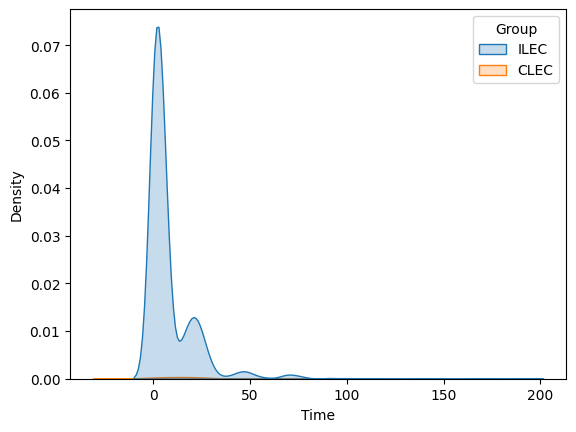

In [8]:
sns.kdeplot(data= verizon, x= 'Time', hue= 'Group', fill= True)

In [11]:
import numpy as np

def statistic(x,y, axis):
    return np.mean(x, axis= axis) - np.mean(y, axis= axis)

x = verizon.loc[verizon['Group'] == 'ILEC','Time']
y = verizon.loc[verizon['Group'] == 'CLEC','Time']

from scipy.stats import permutation_test

res = permutation_test((x,y), statistic, vectorized= True, n_resamples= 99999, alternative= 'less')

res.statistic, res.pvalue

(-8.097519857859533, 0.01793)

assumptions page 74

In [1]:
import pandas as pd
import numpy as np

recidivism = pd.read_csv("rawdata\Recidivism.csv")

In [2]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

In [3]:
recidivism['Recid'] = lb.fit_transform(recidivism['Recid'])

In [5]:
def statistic(x,y, axis):
    return np.mean(x, axis= axis) - np.mean(y, axis= axis)

x = recidivism.loc[recidivism['Age25'] == 'Over 25','Recid']
y = recidivism.loc[recidivism['Age25'] == 'Under 25','Recid']


In [12]:

from scipy.stats import permutation_test

res = permutation_test((x,y), statistic, vectorized= True, n_resamples= 9999, alternative= 'two-sided')

res.statistic, res.pvalue # a chance de reproduzir res.statistics em uma comparação statistics é de res.pvalue

(-0.05919912789728676, 0.0002)